#                                               Projeto WPT


### Diagrama do modelo eletrodinâmico do circuito WPT


![alt text](eq.png "Alo")


$$ Z_{eq} = \frac{\frac{1}{j\omega{C}_{2}}R_{C}}{\frac{1}{j\omega{C}_{2}}+R_{C}} = \frac{R_{C}}{j\omega{R}_{C}{C}_{2} +1} $$

$$ \hat{V}_{f} = R_{1}\hat{I}_{1} + j\omega{L}_{1}\hat{I}_{1} + \frac{1}{j\omega{C}_{1}}\hat{I}_{1} - j\omega M\hat{I}_{2} $$

$$ j\omega M\hat{I}_{1} =  j\omega{L}_{2}\hat{I}_{2} + R_{2}\hat{I}_{2} + Z_{eq}\hat{I}_{2}$$


$$\begin{bmatrix} {R}_{1} + j\omega{L}_{1} + \frac{1}{j\omega{C}_{1}} & - j\omega M  \\ - j\omega M & j\omega{L}_{2} + R_{2} + Z_{eq}   \end{bmatrix} \begin{bmatrix} \hat{I}_{1} \\ \hat{I}_{2}  \end{bmatrix} = \begin{bmatrix} \hat{V}_{f} \\ 0  \end{bmatrix}$$

### Modelo Numérico


Módulos Utilizados


In [49]:
#Vamos importar os módulos que precisamos
from math import *
from cmath import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

Variáveis do Sistema:  $R_C= 10\Omega$, $R_1=0,5\Omega$, $R_2=0,5\Omega$, $L_1=300 mH$, $L_2=300 mH$, $C_1 = 1\mu F$, $C_2 = 1\mu F$ e $k=0,5$

In [50]:
# Implementação Variáveis
R_1 = 2.207*1.83
R_2= 2.272*1.83
L_1 = 500e-6
L_2 = 495.9e-6
C_1 = 0.1e-6
C_2 = C_1
V1 = 13*(2/pi)
RC= 100

In [51]:
w_ref = 1 / sqrt(((L_1)) * C_1)
f_ref = w_ref / (2*np.pi)
print(f'Frequência de ressonância : {abs(f_ref):.2f} Hz')

Frequência de ressonância : 26503.75 Hz


In [52]:
def calcula_parametros(w,k):
    M = k*np.sqrt(L_1*L_2)
    XL1 = 0 + w*L_1*1j
    XL2 = 0 + w*L_2*1j
    XC1 = 0 - (1/(w*C_1))*1j
    XC2 = 0 - (1/(w*C_2))*1j
    Z_eq = ( RC* XC2) / ( RC+ XC2)
    XM = 0 + (w*M)*1j
    Z1 = R_1 + XL1 + XC1
    Z2 = XL2 + R_2 + Z_eq
    Z = np.array([
        [Z1, -XM],
        [-XM,  Z2]
    ])
    V = np.array([V1, 0])
    I1,I2 = np.dot(linalg.inv(Z), V)
    V2 = Z_eq * I2
    IC = V2 / RC
    return I1, I2, IC, V2


### Gráficos das Correntes x Frequência


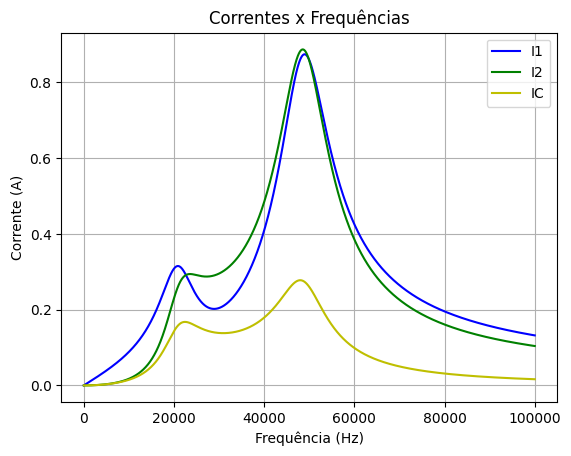

In [53]:
lista_frequencias = np.arange(10,100000,10)
params = [[],[],[],[]]
for f in lista_frequencias:
    w = 2*np.pi*f
    I1,I2,IC,V2 = calcula_parametros(w,0.7)
    params[0].append(I1)
    params[1].append(I2)
    params[2].append(IC)
    params[3].append(V2)

plt.plot(lista_frequencias,np.abs(params[0]),'b',label = ("I1"))
plt.plot(lista_frequencias,np.abs(params[1]),'g',label = ("I2"))
plt.plot(lista_frequencias,np.abs(params[2]),'y',label = ("IC"))
plt.legend()
plt.title('Correntes x Frequências')
plt.ylabel("Corrente (A)")
plt.xlabel("Frequência (Hz)")
plt.grid(True)
plt.show()


### Gráficos das Potências


In [54]:
def potencia(Veq, Ieq):
    S = (Veq/sqrt(2))*(Ieq/sqrt(2)).conjugate()
    return S
#Função que calcula potência em função de I do resistor e R
def potencia_resistor(Ir,R):
    S =R*(Ir/sqrt(2))*(Ir/sqrt(2)).conjugate()
    return S

In [55]:
params2 = [[],[],[],[]]

for f in lista_frequencias:
    w = 2*np.pi*f
    I1,I2,IC,V2 = calcula_parametros(w,0.7)
    S_entrada = potencia(I1,V1)
    S_saida = potencia(V2,IC)
    n = (S_saida.real/S_entrada.real)*100
    params2[0].append(abs(S_entrada.real))
    params2[1].append(abs(S_saida.real))
    params2[2].append(abs(n))
    params2[3].append(abs(V2))





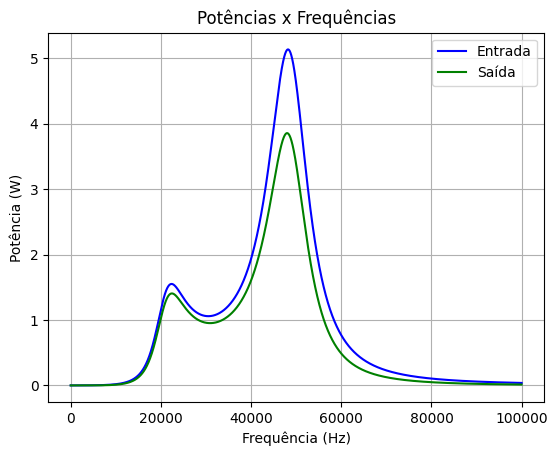

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(lista_frequencias,params2[0],'b',label = ("Entrada"))
plt.plot(lista_frequencias,params2[1],'g',label = ("Saída"))
plt.legend()
plt.title('Potências x Frequências')
plt.ylabel("Potência (W)")
plt.xlabel("Frequência (Hz)")
plt.grid(True)
plt.show()

### Gráfico Eficiência x Frequência


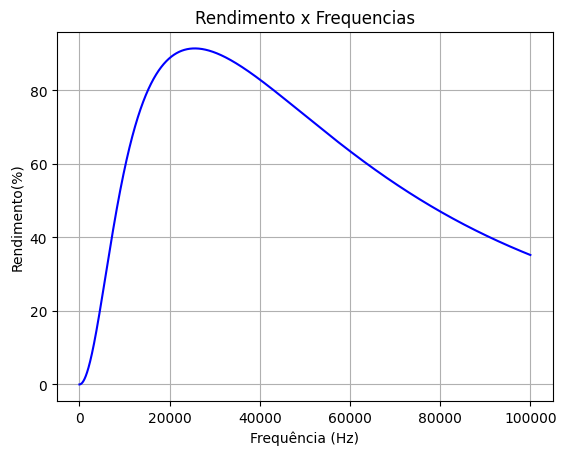

In [57]:
plt.plot(lista_frequencias,params2[2],'b')
plt.title('Rendimento x Frequencias')
plt.ylabel("Rendimento(%)")
plt.xlabel("Frequência (Hz)")
plt.grid(True)
plt.show()

### Gráfico Tensão na Carga x K


In [85]:
lista_k = np.arange(0,1,0.01)
lista_vs = [[],[],[]]
ws = [2*np.pi*28000,2*np.pi*30000,2*np.pi*32000]
i = 0
for i in range(0,3):
    for k in lista_k:
        I1,I2,IC,V2 = calcula_parametros(ws[i],k)
        lista_vs[i].append(V2)

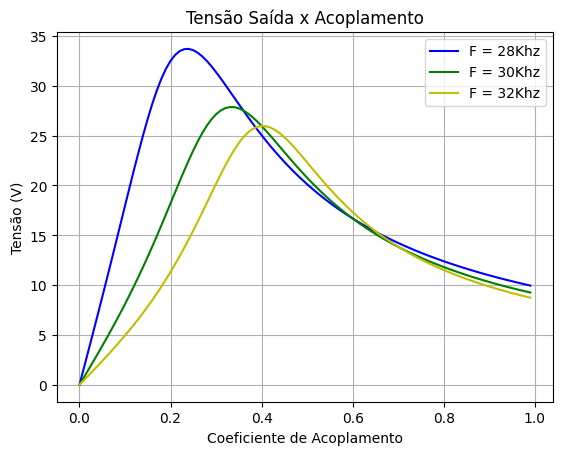

In [86]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(lista_k,np.abs(lista_vs[0]),'b',label = ("F = 28Khz"))
plt.plot(lista_k,np.abs(lista_vs[1]),'g',label = ("F = 30Khz"))
plt.plot(lista_k,np.abs(lista_vs[2]),'y',label = ("F = 32Khz"))
plt.title('Tensão Saída x Acoplamento')
plt.legend()
plt.ylabel("Tensão (V)")
plt.xlabel("Coeficiente de Acoplamento")
plt.grid(True)
plt.show()